<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/15_2_%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D1%86%D0%B8%D1%84%D1%80_(%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Простые нейронные сети. Знакомство с библиотекой Keras](https://colab.research.google.com/drive/16xfRAdyg-Re1bP2cyYpbpAALa6noUL3U)
2. Распознание рукописных цифр (Практика)
3. [Домашняя работа](https://colab.research.google.com/drive/1RD-x2WPmMBtutQzeKiigOoHKwp1MZNd9)

Перед нами стоит задача: реализовать классификацию черно-белых изображений рукописных цифр (28 × 28 пикселов) по 10 категориям (от 0 до 9). Мы будем
использовать набор данных MNIST, популярный в сообществе исследователей глубокого обучения, который существует практически столько же, сколько сама
область машинного обучения, и широко используется для обучения. Этот набор
содержит 60 000 обучающих изображений и 10 000 контрольных изображений,
собранных Национальным институтом стандартов и технологий США (National
Institute of Standards and Technology — часть NIST в аббревиатуре MNIST) в 1980-х.

Решение задачи MNIST можно рассматривать как своеобразный аналог «Hello
World» в глубоком обучении — часто это первое действие, которое выполняется,
чтобы убедиться, что алгоритмы действуют в точности как ожидалось. По мере
углубления в практику машинного обучения вы увидите, что MNIST часто упоминается в научных статьях, публикациях на Хабре, блогах и т. д.

## Загрузка библиотеки MNIST

Набор данных MNIST уже входит в состав Keras в форме набора из четырех массивов Numpy:

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


`train_images` и `train_labels` — это тренировочный набор, то есть данные,
необходимые для обучения.

После обучения модель будет проверяться тестовым (или контрольным) набором, `test_images` и `test_labels`.


> **ЗАМЕТКА О КЛАССАХ И МЕТКАХ**

    В машинном обучении категория в задаче классификации называется классом.
    Элементы исходных данных называются образцами.
    Класс, связанный с конкретным образцом, называется меткой.

Изображения хранятся в массивах Numpy, а метки — в массиве цифр от 0 до 9. Изображения и метки находятся в прямом соответствии, один к одному.

Рассмотрим обучающие данные:

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

И тестовые данные:

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

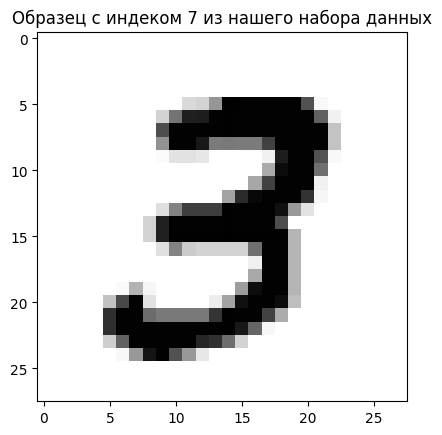

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[7]
fig, ax = plt.subplots(1,1)
ax.set_title('Образец с индеком 7 из нашего набора данных')
ax.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Моделирование нейронной сети

Далее мы сконструируем модель нейронной сети и передадим ей обучающие данные `train_images` и `train_labels`. В результате этого модель обучится сопоставлять изображения с метками. Затем мы предложим модели классифицировать изображения в `test_images` и проверим точность классификации по меткам.

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

Основным строительным блоком нейронных сетей (НС) является слой, модуль обработки данных, который можно рассматривать как фильтр для данных.Это другой взгляд на НС, отличный тому, что мы обсуждали ранее. Таким подходом любят пользоваться аналитики данных. Они смотрят на нейронную сеть как на слоеный пирог с набором фильтров, через которые проходят данные.

Фильтр принимает некоторые данные и выводит их в более полезной форме. В частности, слои извлекают представления из подаваемых в них данных, которые, как мы надеемся, будут иметь больше смысла для решаемой задачи. Фактически методика глубокого обучения заключается в объединении простых слоев, реализующих некоторую форму поэтапной очистки данных. Модель глубокого обучения можно сравнить с ситом, состоящим из последовательности фильтров все более тонкой очистки данных — слоев.

В данном случае наша сеть состоит из последовательности двух слоев Dense, которые являются полносвязными нейронными слоями. Второй (и последний) слой — это 10-переменный слой потерь (softmax), возвращающий массив с 10 оценками вероятностей (в сумме дающих 1).

Каждая оценка определяет вероятность принадлежности текущего изображения
к одному из 10 классов цифр.

## Компиляция модели

Следующий шаг - это компиляция модели.

На этом этапе мы должны задать:

* **функцию потерь**, которая определяет, как сеть должна оценивать качество своей работы на обучающих данных и, соответственно, как корректировать ее в правильном направлении;
* **оптимизатор** — механизм, с помощью которого сеть будет обновлять себя, опираясь на наблюдаемые данные и функцию потерь;
* **метрики для мониторинга на этапах обучения и тестирования** — здесь нас
будет интересовать только точность (`accuracy` - доля правильно классифицированных изображений).


In [ ]:
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

`categorical_crossentropy` — это функция потерь, которая используется в качестве сигнала обратной связи для обучения весовых тензоров и которую этап обучения стремится свести к минимуму. Cнижение потерь достигается за счет применения алгоритма стохастического градиентного спуска на небольших пакетах (мини-батчах). Точные правила, управляющие конкретным применением градиентного спуска, определяются оптимизатором `rmsprop`, который передается в первом аргументе.

## Подготовка данных

Перед обучением модели нам необходимо выполнить предварительную обработку данных, преобразовав их в форму, которую ожидает получить от нас нейронная сеть, и масштабировать их так, чтобы все значения оказались в интервале $[0, 1]$.

Исходные данные — обучающие изображения — хранятся в трехмерном массиве $(60000, 28, 28)$ типа $uint8$, значениями в котором являются числа в интервале $[0, 255]$. Мы преобразуем его в массив $(60000, 28 * 28)$ типа $float32$ со значениями в интервале $[0, 1]$.

In [ ]:
# изменение формы тензора
train_images = train_images.reshape((60000, 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
train_images = train_images.astype('float32') / 255

# изменение формы тензора
test_images = test_images.reshape((10000, 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
test_images = test_images.astype('float32') / 255

Метка это число. Как нам подать число на 10 нейронов выходного слоя? Для этого нам нужно закодировать метки категорий или как еще говорят "векторизовать метки".

Векторизовать метки можно одним из двух способов: сохранить их в тензоре
целых чисел или использовать прямое кодирование. Прямое кодирование (onehot encoding) широко используется для форматирования категорий и также называется кодированием категорий (categorical encoding).

В данном случае прямое кодирование меток заключается в конструировании вектора с нулевыми элементами и со значением 1 в элементе, индекс которого соответствует индексу метки. Например:

In [ ]:
import numpy as np
def to_one_hot(labels, dimension=10): # dimension - число классов
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

Для кодирования в формате `onehot encoding` в Keras есть готовая функция:

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10) # Кодируем обучающие метки на 10 классов
test_labels = to_categorical(test_labels, 10)   # Кодируем тестовые метки на 10 классов

## Обучение и оценка модели

Теперь можно начинать обучение сети, для чего достаточно вызвать метод `fit()` модели, который адаптирует нашу модель (ее веса) под обучающие данные.
Обратите внимание на числа - 469 - это количество батчей (пакетов), а 128 - это количество примеров.. Получается 469 батчей по 128 примеров, подаваемых за раз.

In [ ]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2602 - accuracy: 0.9257 - val_loss: 0.1346 - val_accuracy: 0.9597
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1059 - accuracy: 0.9688 - val_loss: 0.0918 - val_accuracy: 0.9714
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0699 - accuracy: 0.9792 - val_loss: 0.0726 - val_accuracy: 0.9774
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0501 - accuracy: 0.9851 - val_loss: 0.0689 - val_accuracy: 0.9794
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0384 - accuracy: 0.9885 - val_loss: 0.0723 - val_accuracy: 0.9767


В процессе обучения отображаются 4 величины:
* `loss` - потери сети на обучающих данных;
* `accuracy` -  точность сети на обучающих данных;
* `val_loss` - потери сети на тестовых данных;
* `val_accuracy` -  точность сети на тестовых данных.

В данном случае мы достигли точности более 0,98 (>98%) на обучающих данных.

Теперь проверим, как модель распознает контрольный набор, с помощью метода модели `evaluate()`, передав ему в качестве позиционных аргументов тестовые изображения и метки:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точность на тестовом образцу:', test_acc)
print('Потери на тестовом образце:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0723 - accuracy: 0.9767
Точность на тестовом образцу: 0.9767000079154968
Потери на тестовом образце: 0.07229446619749069


Точность на контрольном наборе составила 98 %, но если посмотреть на десятые доли процента точности обучающей и тестовых выборок, то немного меньше. Эта разница между точностью на тренировочном и контрольном наборах демонстрирует пример переобучения (overfitting), когда модели машинного обучения показывают худшую точность на новом наборе данных по сравнению с тренировочным.



### Предсказание

Чтобы ваша модель сделала предсказание, нужно вызвать метод `.predict()` и передать в него данные для распознавания. Выберем произвольную картинку из тестовой выборки и посмотрим на ее форму:


In [ ]:
# Выбор нужной картинки из тестовой выборки
n = 23
x = test_images[n]

# Проверка формы данных
print(x.shape)


(784,)


Если мы в таком виде передадим данные в модель для предсказания, то получим ошибку. Нам необходимо добавить одну ось в начале, чтобы нейронка могла распознать пример.

In [ ]:
import numpy as np

# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


Теперь форма соответствует той, что ожидает модель:

In [ ]:
# Предсказываем выбранную картинку
prediction = model.predict(x)

# Вывод результата - вектор из 10 чисел
print(f'Вектор результата на 10 выходных нейронах: {prediction}')

# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')
print(f'Правильное значение: {np.argmax(test_labels[n])}')

1/1 [==============================] - 0s 138ms/step
Вектор результата на 10 выходных нейронах: [[1.4143262e-10 5.5334803e-11 2.7699665e-10 2.6629507e-07 5.4474602e-12
  9.9999952e-01 8.5542020e-08 9.3701251e-13 3.1389959e-08 7.8608942e-08]]
Распознана цифра: 5
Правильное значение: 5


### Визуализация процесса обучения

Вызов `model.fit()` возвращает объект History. Этот объект имеет поле history — словарь с данными обо всем происходившем в процессе обучения. Заглянем в него:

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Словарь содержит четыре элемента — по одному на метрику, — за которыми
осуществлялся мониторинг в процессе обучения и проверки.

Построим график потерь на этапах обучения и проверки:


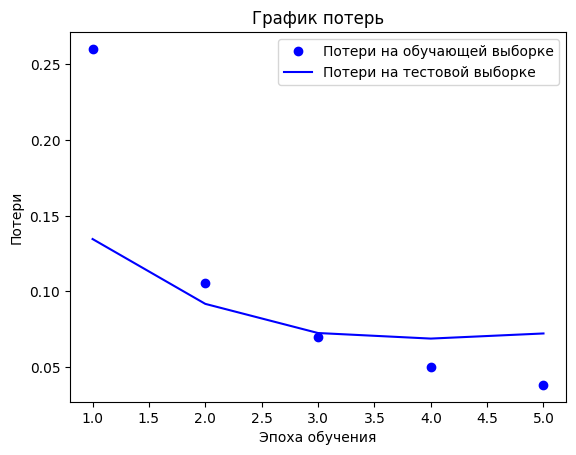

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

Построим график точности на этапах обучения и проверки:

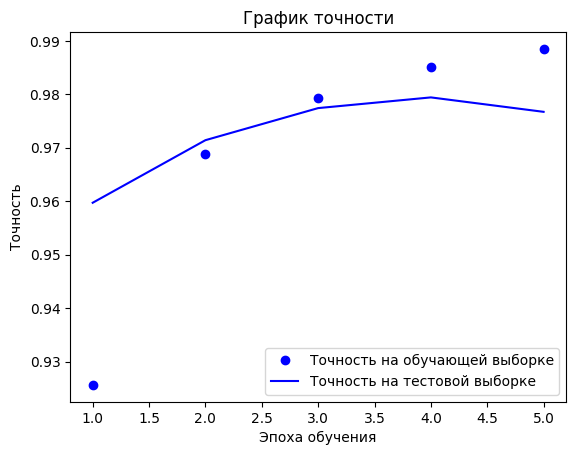

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

На графиках видно, что на этапе обучения потери снижаются с каждой эпохой, а точность растет. Именно такое поведение ожидается от оптимизации градиентным спуском: величина, которую вы пытаетесь минимизировать, должна становиться
все меньше с каждой итерацией. Но это не относится к потерям и точности на
этапе проверки: после третьей эпохи они практически не меняются. Это пример
того, о чем мы говорили выше, что модель, показывающая хорошие результаты на обучающих данных, не обязательно будет показывать такие же хорошие результаты на данных, которые не видела прежде. Выражаясь точнее, в данном случае наблюдается переобучение: после третьей эпохи произошла чрезмерная оптимизация на обучающих данных, и в результате получилось представление, характерное для обучающих данных, не обобщающее данные за пределами обучающего набора.
В данном случае для предотвращения переобучения можно прекратить обучение
после третьей эпохи. Вообще говоря, есть целый спектр приемов, ослабляющих
эффект переобучения, которые мы рассмотрим позже.

### Немного теории

#### Мини-батчи

В общем случае первая ось (ось с индексом 0) во всех тензорах, с которыми вам придется столкнуться в глубоком обучении, будет осью образцов (иногда ее называют измерением образцов). В примере MNIST образцы — это изображения цифр.

Кроме того, модели глубокого обучения не обрабатывают весь набор данных целиком, а разбивают его на небольшие пакеты.

В примере выше при обучении модели мы указали размер пакет (мини-батча) `batch_size = 128`.

Что означает, что первым пакетом для обучения будет:

```python
batch = train_images[:128]
```

А следующий пакет:
```python
batch = train_images[128:256]
```

А вот n-й пакет:
```python
batch = train_images[128 * n:128 * (n + 1)]
```

При рассмотрении таких пакетных тензоров первую ось (ось с индексом 0) называют осью пакетов, или измерением пакетов. Эта терминология часто будет встречаться вам при работе с Keras и другими библиотеками глубокого обучения.

Теперь зная, как делятся тренировочные данные на пакеты, мы можем понять как происходит весь процесс обучения на мини-батчах при вызове fit: сеть начинает перебирать обучающие данные мини-пакетами по 128 образцов и выполняет 5 итераций (каждая итерация по всем обучающим данным называется эпохой). Для каждого мини-пакета сеть вычисляет градиенты весов с учетом потерь в пакете и изменяет значения весов в соответствующем направлении. В течение пяти эпох сеть выполнит 2345 изменений градиента (по 469 на эпоху), после чего потери сети окажутся достаточно низкими, чтобы эта сеть смогла классифицировать рукописные цифры с высокой точностью.

#### Изменение формы тензора

Эту операцию мы использовали ее, когда готовили исходные данные для передачи в модель:
```python
train_images = train_images.reshape((60000, 28 * 28))
```
Изменение формы тензора предполагает такое переупорядочение строк и столбцов,
чтобы привести его форму к заданной. Разумеется, тензор с измененной формой
имеет такое же количество элементов, что и исходный тензор. Чтобы было понятнее, рассмотрим несколько простых примеров:


In [ ]:
import numpy as np
x = np.array([[0., 1.],
[2., 3.],
[4., 5.]])

print(x.shape)

(3, 2)


In [ ]:
x = x.reshape((6, 1))
print(x)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


In [ ]:
x = x.reshape((2, 3))
print(x)

[[0. 1. 2.]
 [3. 4. 5.]]


Особый случай изменения формы, который часто встречается в практике, — это
транспонирование. Транспонирование — это такое преобразование матрицы, когда
строки становятся столбцами, а столбцы — строками, то есть $x[i, :]$ превращается в $x[:, i]$:

In [ ]:
x = np.zeros((50, 10))
x = np.transpose(x)
print(x.shape)

(10, 50)


#### Общая схема улучшения ваших моделей

После того, как вы провели обучение простой случайной архитектуры модели (базовый случай), ваша цель должна состоять в достижении статистической мощности, то есть разработать небольшую модель, способную выдать более качественный результат по сравнению с базовым случаем.

Обратите внимание на то, что не всегда удается достичь статистической мощности.
Если модель не в состоянии дать более высокую точность, чем простой случайный
выбор после исследования нескольких разумных архитектур,
вполне возможно, что во входных данных отсутствует ответ на вопрос, который
вы пытаетесь задать.

**Не забывайте, что вы ставите две гипотезы:**

* гипотеза о том, что выходные данные можно предсказать по входным данным;
* гипотеза о том, что доступные данные достаточно информативны для изучения
отношений между входными и выходными данными.

**Вполне возможно, что эти гипотезы ошибочны, и тогда вам придется выполнить проектирования с самого начала.**

Если все идет как надо, **вам нужно сделать три ключевых выбора для создания
первой рабочей модели:**

* **Функция активации для последнего уровня** — устанавливает эффективные
ограничения на результат сети. Например, в случае задач бинарной классификации на последнем уровне используется функция `sigmoid`, в случае многоклассовой классификации - `softmax`, а в случае регрессии
вообще не используется функция активации на последнем уровне (а точнее используется линейная функция активации) и т. д.
* **Функция потерь — должна соответствовать типу решаемой задачи**. Например,
в случае бинарной классификации используется функция потерь `binary_crossentropy`, в случае регрессии используется функция `mse` и т. д.
* **Конфигурация оптимизации** — какой оптимизатор использовать? Какой выбрать
шаг обучения? В большинстве случаев с успехом можно использовать `rmsprop` с шагом обучения по умолчанию, в качестве альтернативы стоит рассматривать `adam`.

Выбирая функцию потерь, имейте в виду, что не всегда можно напрямую оптимизировать показатель успеха решения задачи. Иногда нет простого способа преобразовать показатель успеха в функцию потерь. Также функции потерь, в конце концов, должны быть вычислимыми на мини-батчах (в идеале функция потерь
должна быть вычислимой на очень маленьких объемах данных, вплоть до одного экземпляра) и дифференцируемыми (иначе не получится использовать обратное
распространение ошибки для обучения сети).

Данная таблица поможет вам на начальном этапе выбрать функцию активации для последнего уровня и функцию потерь для некоторых типичных задач:


<table>
<caption><b>Таблица.</b> Выбор функции активации для последнего уровня и функции потерь</caption>
<tr><th>Тип задачи
</th><th>Функция активации
для последнего
уровня</th><th>Функция потерь</th></tr>
<tr><td>Бинарная классификация</td><td>sigmoid</td><td>binary_crossentropy</td></tr>
<tr><td>Многоклассовая, однозначная классификация</td><td>softmax</td><td>categorical_crossentropy</td></tr>
<tr><td>Многоклассовая, многозначная классификация</td><td>sigmoid</td><td>binary_crossentropy</td></tr>
<tr><td>Регрессия по произвольным значениям</td><td>Нет (линейная)</td><td>mse</td></tr>
<tr><td>Регрессия по значениям между 0 и 1</td><td>sigmoid</td><td>mse или binary_crossentropy</td></tr>
</table>


После получения модели, обладающей статистической мощностью, встает вопрос
о достаточной мощности модели.

**Достаточно ли слоев и параметров, чтобы правильно смоделировать задачу?**

Например, сеть с единственным скрытым (промежуточным) слоем, имеющим два параметра, будет иметь некоторую статистическую мощность для классификации цифр из набора MNIST, но недостаточную, чтобы считать задачу решенной. Не забывайте о распространенной проблеме машинного обучения — противоречии между оптимизацией и общностью. Идеальной считается модель, которая стоит непосредственно на границе между недообучением и переобучением, между недостаточной и избыточной емкостью. Чтобы понять, где пролегает эта граница, ее сначала нужно пересечь.

**Чтобы понять, насколько большой должна быть модель, сначала нужно сконструировать модель, обладающую эффектом переобучения.**

Сделать это просто:

1. Добавьте слои.
2. Задайте большое количество параметров в слоях.
3. Обучите модель на большом количестве эпох.

Постоянно контролируйте, как меняется уровень потерь на этапах обучения и проверки, а также любые другие показатели на этих же этапах, которые вас интересуют.

**Ухудшение качества модели на проверочных данных свидетельствует о достижении
эффекта переобучения.**

Следующий шаг — регуляризация и настройка модели, чтобы как можно ближе
подойти к идеальной модели, которая не страдает ни недообучением, ни переобучением.

Этот шаг занимает больше всего времени: вам придется многократно изменять
свою модель, обучать ее, оценивать качество на проверочных данных, снова изменять ее и повторять этот цикл, пока качество модели не достигнет желаемого уровня. Вот кое-что из того, что вы должны попробовать:

* добавить прореживание;
* опробовать разные архитектуры: добавлять и удалять слои;
* добавить L1- и (или) L2-регуляризацию;
* опробовать разные гиперпараметры (например, число нейронов на слой или шаг
обучения оптимизатора), чтобы найти оптимальные настройки;
* дополнительно можно выполнить цикл конструирования признаков: добавить
новые признаки или удалить имеющиеся, которые не кажутся информативными.

На данном этапе, вы еще не знакомы с методами регуляризации, с ними вы будете знакомиться на следующих уроках, однако, уже сейчас вы можете провести регуляризацию и настройку модели, меняя архитектуру сети и ее гиперпараметры.

Получив удовлетворительную конфигурацию, можно обучить окончательный
вариант модели на всех доступных данных (тренировочных и проверочных) и оценить ее качество на контрольном наборе. Если качество модели на контрольных
данных окажется значительно хуже, чем на проверочных, это может означать, что
ваша процедура проверки была ненадежной или в процессе настройки параметров
модели проявился эффект переобучения на проверочных данных. В этом случае
можно попробовать переключиться на использование другого, более надежного
протокола оценки (такого, как итерационная проверка по K блокам с перемешиванием).

**Рекомендация.** Прежде чем перейти к домашней работе. Оптимизируйте датасет из текущей практики, добейтесь его статистической мощности, подтвердите свои предположения на тестовой выборке. Когда вы перейдете к домашней работе, то число классов будет больше, несмотря на сходство задач, а значит точностью модели значительно упадет. Вам придется увеличивать число эпох обучения, а значит вероятность переобучения вырастит.   

Теперь пора перейти к [домашней работе](https://colab.research.google.com/drive/1RD-x2WPmMBtutQzeKiigOoHKwp1MZNd9) и попрактиковаться в распознавании рукописных букв.